In [1]:
%pip install -U pip
%pip install scikit-image
%pip install -U pip
%pip install matplotlib   
%matplotlib inline


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
print(sys.executable)


/Users/murakamimanabu/Desktop/python_programming_demo_app-0.0.1 2/.venv/bin/python


In [3]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import numpy as np

print(cv2.__version__)


4.12.0


scikit-image https://scikit-image.org
OpenCV https://opencv.org
Python Image Library (PIL) http://www.pythonware.com/products/pil/ (deplicated)
Pillow or (PIL) https://pillow.readthedocs.io/en/stable/

In [5]:
%pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray();
from matplotlib.pyplot import imshow

import skimage
from skimage.io import imread, imsave

from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_otsu, threshold_local
from skimage.exposure import histogram, adjust_gamma
from skimage.morphology import square
from skimage import measure, color, morphology

import cv2

import numpy as np

from ipywidgets import interact, interactive, fixed, RadioButtons
import ipywidgets as widgets
from IPython.display import display

<Figure size 640x480 with 0 Axes>

画像ダウンロード


In [7]:
%pip install requests


Note: you may need to restart the kernel to use updated packages.


In [8]:
import requests

def download(url, filename, timeout=20):
    headers = {"User-Agent": "Mozilla/5.0 (simple-downloader)"}
    try:
       r = requests.get(url, headers=headers, timeout=timeout)
       if r.status_code != 200:
           print(f"ERR {r.status_code}: {url}")  # ← 404等を見逃さない
           return False
       with open(filename, 'wb') as f:
           f.write(r.content)
       print(f"OK  -> {filename}")
       return True
    except requests.RequestException as e:
       print(f"ERR {url} -> {e}")
       return False

    
# TheDefiniteArticle - Own work CC BY-SA 4.0
# https://commons.wikimedia.org/wiki/File:Woy_Woy_Channel_-_Vignetted.jpg
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/lake.jpg',
    # 'https://upload.wikimedia.org/wikipedia/commons/0/03/Woy_Woy_Channel_-_Vignetted.jpg',
    'lake.jpg')

# Pixabay License
# https://pixabay.com/photos/girl-portrait-looking-young-female-919048/
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/girl.jpg',
    # 'https://cdn.pixabay.com/photo/2015/09/02/13/24/girl-919048_1280.jpg',
    'girl.jpg')

# Baka888 - Own work CC BY-SA 4.0
# https://commons.wikimedia.org/wiki/File:Worldflags19.png
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/flag.png',
    # 'https://upload.wikimedia.org/wikipedia/commons/b/bb/Worldflags19.png',
    'flag.png')

# yellowcloud CC BY 2.0
# https://www.flickr.com/photos/yellowcloud/6375883291
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/IR_cat.jpg',
    # 'https://live.staticflickr.com/6226/6375883291_972be61f52_w_d.jpg',
    'IR_cat.jpg')

# Achim Köhler~commonswiki CC BY-SA 3.0
# https://commons.wikimedia.org/w/index.php?curid=555450
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/salt_and_pepper.png',
    # 'https://upload.wikimedia.org/wikipedia/commons/3/32/Dead_tree_salt_and_pepper.png',
    'salt_and_pepper.png')

# Pixabay License
# https://pixabay.com/ja/illustrations/ハニカム-蜂の巣-自然-2891372/
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/honeycomb.jpg',
    # 'https://cdn.pixabay.com/photo/2017/10/26/15/05/honeycomb-2891372_1280.jpg',
    'honeycomb.jpg')

# Christoph Michels - Own work CC BY-SA 3.0
# https://commons.wikimedia.org/wiki/File:Text.JPG
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/text.jpg',
    # 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Text.JPG/640px-Text.JPG',
    'text.jpg')

# 由紀奈 / CC0
# https://commons.wikimedia.org/wiki/File:Start.wav
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/start.wav',
    # 'https://upload.wikimedia.org/wikipedia/commons/9/93/Start.wav',
    'start.wav')

# Shirt58 CC0
# https://en.wikipedia.org/wiki/File:Shirt58_handwriting.png
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/writing.png',
    # 'https://upload.wikimedia.org/wikipedia/en/thumb/5/5d/Shirt58_handwriting.png/800px-Shirt58_handwriting.png',
    'writing.png')

# Tkgd2007 - Own work CC BY-SA 3.0
# https://commons.wikimedia.org/wiki/File:Human_evolution.svg
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/evol.png',
    # 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Human_evolution.svg/600px-Human_evolution.svg.png',
    'evol.png')

# Designguy84 - Photo CC BY-SA 3.0
# https://commons.wikimedia.org/wiki/File:Early_Imperial_Australian_Coins.jpg
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/coins.jpg',
    # 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Early_Imperial_Australian_Coins.jpg/320px-Early_Imperial_Australian_Coins.jpg',
    'coins.jpg')

# Donald Trung CC BY-SA 4.0
# https://commons.wikimedia.org/wiki/File:Taxi_Noord_business_card,_Oude_Pekela_(2020)_02.jpg
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/card.jpg',
    # 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Taxi_Noord_business_card%2C_Oude_Pekela_%282020%29_02.jpg/640px-Taxi_Noord_business_card%2C_Oude_Pekela_%282020%29_02.jpg',
    'card.jpg')

# Diliff - Own work CC BY-SA 2.5
# http://en.wikipedia.org/wiki/File:Colosseum_in_Rome,_Italy_-_April_2007.jpg
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/Colosseum.jpg',
    # 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Colosseum_in_Rome%2C_Italy_-_April_2007.jpg/640px-Colosseum_in_Rome%2C_Italy_-_April_2007.jpg',
    'Colosseum.jpg')
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/Colosseum_original.jpg',
    # 'https://upload.wikimedia.org/wikipedia/commons/5/53/Colosseum_in_Rome%2C_Italy_-_April_2007.jpg',
    'Colosseum_original.jpg')

# # Peter Haas CC BY-SA 3.0
# # https://commons.wikimedia.org/wiki/File:Notre-Dame_de_Paris_2013-07-24.jpg
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/Nortre-Dame-1.jpg',
    # 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Notre-Dame_de_Paris_2013-07-24.jpg/355px-Notre-Dame_de_Paris_2013-07-24.jpg',
    'Nortre-Dame-1.jpg')

# # Dietmar Rabich CC BY-SA 4.0
# # https://commons.wikimedia.org/wiki/File:Paris,_Notre_Dame_--_2014_--_1445.jpg
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/Nortre-Dame-2.jpg',
    # 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Paris%2C_Notre_Dame_--_2014_--_1445.jpg/301px-Paris%2C_Notre_Dame_--_2014_--_1445.jpg',
    'Nortre-Dame-2.jpg')

# CC0 1.0
# https://openclipart.org/detail/247372/woman-walking
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/sil.png',
    # 'https://openclipart.org/image/400px/svg_to_png/247372/WomanWalking.png',
    'sil.png')

# NASA Public domain
# File:Moon right-view (Clementine dataset).png
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/moon.png',
    # 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Moon_right-view_%28Clementine_dataset%29.png/800px-Moon_right-view_%28Clementine_dataset%29.png',
    'moon.png')

# OpenCV BSD
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/aloeL.jpg',
    # 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeL.jpg', 
    'aloeL.jpg')
download(
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/aloeR.jpg',
    # 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeR.jpg', 
    'aloeR.jpg') 

OK  -> lake.jpg
OK  -> girl.jpg
OK  -> flag.png
OK  -> IR_cat.jpg
OK  -> salt_and_pepper.png
OK  -> honeycomb.jpg
OK  -> text.jpg
OK  -> start.wav
OK  -> writing.png
OK  -> evol.png
OK  -> coins.jpg
OK  -> card.jpg
OK  -> Colosseum.jpg
OK  -> Colosseum_original.jpg
OK  -> Nortre-Dame-1.jpg
OK  -> Nortre-Dame-2.jpg
OK  -> sil.png
OK  -> moon.png
OK  -> aloeL.jpg
OK  -> aloeR.jpg


True

In [9]:
# Axel Jacobs (Photographer) - Axel Jacobs, WebHDR CC BY-SA 2.0
# https://commons.wikimedia.org/wiki/File:HDRI_Sample_Scene_Window_-_01.jpg
# ..
# https://commons.wikimedia.org/wiki/File:HDRI_Sample_Scene_Window_-_12.jpg

urls = [
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_00.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_01.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_02.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_03.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_04.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_05.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_06.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_07.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_08.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_09.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_10.jpg',
    'https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_11.jpg',
]

# urls = \
# ['https://upload.wikimedia.org/wikipedia/commons/5/51/HDRI_Sample_Scene_Window_-_01.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/c/c1/HDRI_Sample_Scene_Window_-_02.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/5/5b/HDRI_Sample_Scene_Window_-_03.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/6/6e/HDRI_Sample_Scene_Window_-_04.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/d/d1/HDRI_Sample_Scene_Window_-_05.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/5/51/HDRI_Sample_Scene_Window_-_06.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/b/b6/HDRI_Sample_Scene_Window_-_07.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/f/f8/HDRI_Sample_Scene_Window_-_08.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/8/83/HDRI_Sample_Scene_Window_-_09.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/c/c0/HDRI_Sample_Scene_Window_-_10.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/6/6e/HDRI_Sample_Scene_Window_-_11.jpg',
# 'https://upload.wikimedia.org/wikipedia/commons/8/8b/HDRI_Sample_Scene_Window_-_12.jpg']


for i, url in enumerate(urls):
    filename = 'hdr_{:02d}.jpg'.format(i)
    print(url, filename)
    download(url, filename)

https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_00.jpg hdr_00.jpg
OK  -> hdr_00.jpg
https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_01.jpg hdr_01.jpg
OK  -> hdr_01.jpg
https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_02.jpg hdr_02.jpg
OK  -> hdr_02.jpg
https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_03.jpg hdr_03.jpg
OK  -> hdr_03.jpg
https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_04.jpg hdr_04.jpg
OK  -> hdr_04.jpg
https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_05.jpg hdr_05.jpg
OK  -> hdr_05.jpg
https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_06.jpg hdr_06.jpg
OK  -> hdr_06.jpg
https://raw.githubusercontent.com/tttamaki/lecture_code/main/ImageProcessing/images/hdr_07.jpg hdr_07.jpg
OK  -> hdr_07.jpg
https://

配列へのアクセス：行，列
配列へのアクセスの順番
行，列
画素へのアクセスの順番
縦，横
y, x
ループを回すなら外側がy，内側がx
配列2つ目のインデックスのほうが連続したメモリ領域

im = np.zeros((2, 3)) # 幅3✕高さ2の画像（配列）
im[0, 1] = 255 # (x,y)=(1,0)の画素へアクセス
print(im)

imshow(im)
plt.axis('off')
plt.show()

C言語なら

#include 
int main(void){
    
    float im[2][3];
    im[0][1] = 255;
    for(int y = 0; y < 2; y++) {
        for(int x = 0; x < 3; x++)
            printf("%.2f, ", im[y][x]);
        printf("\n");
    }
    return 0;
}

カラー画像とグレースケール画像


shape:  (853, 1280, 3)
row:  853
col:  1280
chn:  3


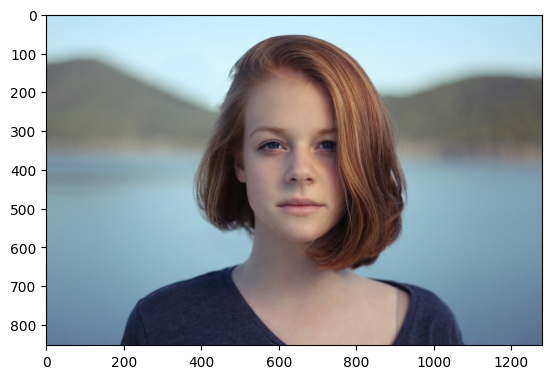

In [10]:
im = imread('girl.jpg')
imshow(im)

print('shape: ', im.shape)
rows, columns, channels = im.shape
print("row: ", rows)
print("col: ", columns)
print("chn: ", channels)

shape:  (853, 1280)
row:  853
col:  1280
chn:  3


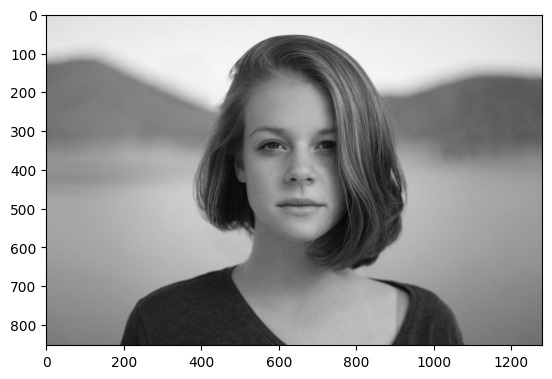

In [11]:
im = rgb2gray(imread('girl.jpg'))
imshow(im)

print('shape: ', im.shape)
rows, columns = im.shape
print("row: ", rows)
print("col: ", columns)
print("chn: ", channels)

RGBチャンネル


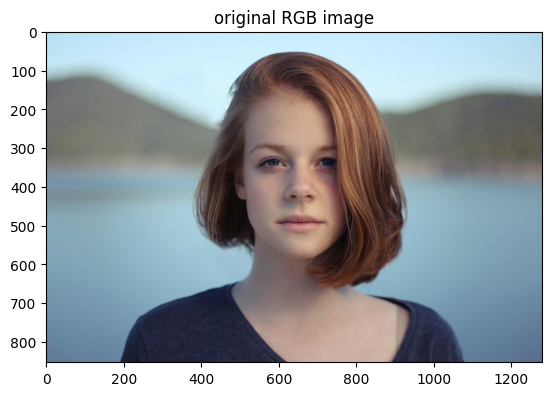

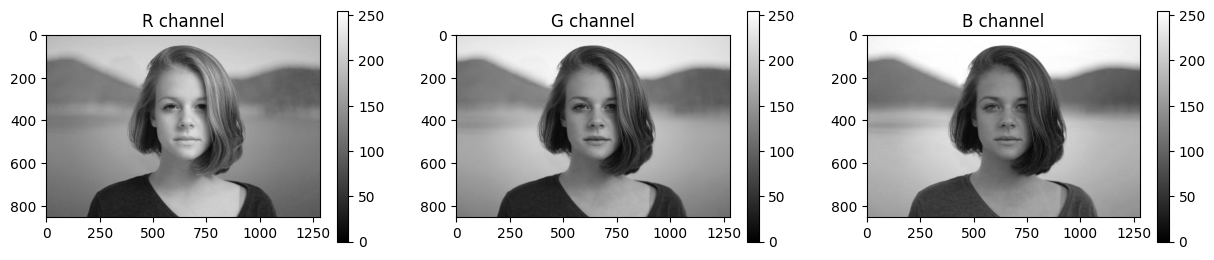

In [12]:
# im = imread('lake.jpg')
# im = imread('flag.png')
im = imread('girl.jpg')

imshow(im)
plt.title("original RGB image")
plt.show()

r_channel = im[:, :, 0]
g_channel = im[:, :, 1]
b_channel = im[:, :, 2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    imshow(im[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title('{} channel'.format(c))

plt.show();

3次元配列でのカラー画像の表現
Packed format
画素へのアクセスの順番
縦，横，チャンネル
y, x, color
1画素の色情報のメモリ領域が連続している
多くの場合はこれ

[[  0 255   0   0]
 [  0   0   0   0]]
[[0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]]


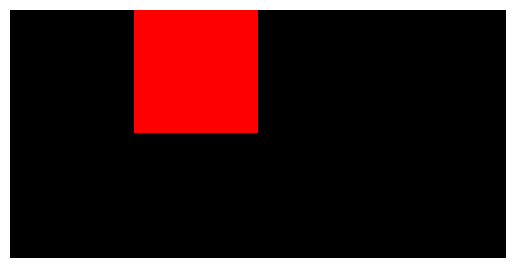

In [13]:
im = np.zeros((2, 4, 3), dtype=np.uint8) # 縦2，横4，3チャンネル分

im[0, 1, 0] = 255

print(im[:, :, 0]) # 赤：0番目のチャンネル
print(im[:, :, 1]) # 緑：1番目のチャンネル
print(im[:, :, 2]) # 青：2番目のチャンネル

imshow(im)
plt.axis('off')
plt.show()

Planar format
画素へのアクセスの順番
チャンネル，縦，横
channel, y, x
「2x3の画像」のメモリ領域が連続している
特殊用途
一部の動画フォーマット
深層学習では「バッチ」

In [14]:
im = np.zeros((3, 2, 4), dtype=np.uint8) # 画像を3枚，縦2，横4
im[0, 0, 1] = 255
print(im)

[[[  0 255   0   0]
  [  0   0   0   0]]

 [[  0   0   0   0]
  [  0   0   0   0]]

 [[  0   0   0   0]
  [  0   0   0   0]]]


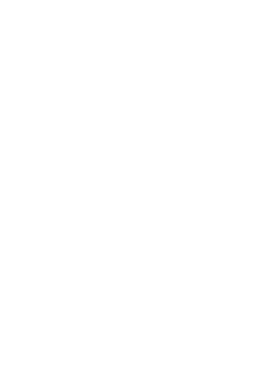

In [15]:
imshow(im) # imshowはpacked formatを仮定しているので，このplanar formatを表示するとおかしなことになる
plt.axis('off')
plt.show()

RGBとBGR
RGB
多くの教科書の説明もこれ
多くの画像処理ライブラリはこれ
pythonならskimage, matplotlib

[[  0 255   0   0]
 [  0   0   0   0]]
[[0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]]


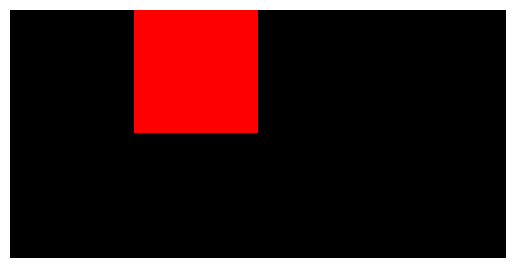

In [16]:
im = np.zeros((2, 4, 3), dtype=np.uint8)

im[0, 1, 0] = 255

print(im[:, :, 0])
print(im[:, :, 1])
print(im[:, :, 2])

imshow(im)
plt.axis('off')
plt.show()

In [17]:
# opencvのimshowはBGRを仮定
cv2.imshow('opencv imshow window', cv2.resize(im, (400, 200), interpolation=cv2.INTER_NEAREST))
cv2.waitKey(3000)  # 3000ms（3秒）待つ
cv2.destroyWindow('opencv imshow window') # 消えないかもしれないけど無視

## RGBとBGRの変換

In [18]:
im_BGR = cv2.imread('girl.jpg') # Opencv
im_RGB = imread('girl.jpg') # sckit-image

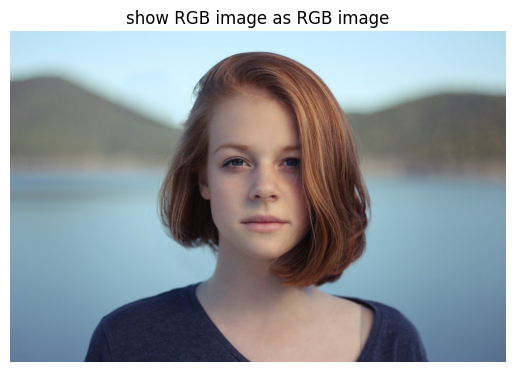

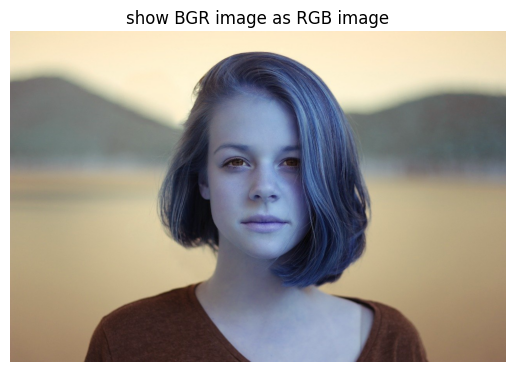

In [19]:
imshow(im_RGB)
plt.title('show RGB image as RGB image')
plt.axis('off')
plt.show()

imshow(im_BGR)
plt.title('show BGR image as RGB image')
plt.axis('off')
plt.show()

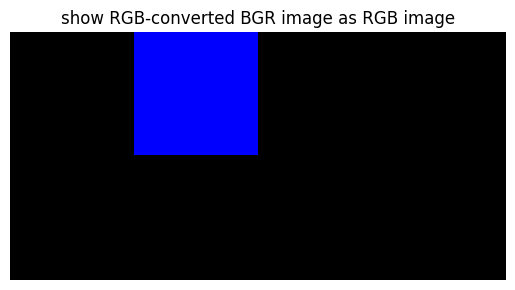

In [20]:
im_BGR_to_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imshow(im_BGR_to_RGB)
plt.title('show RGB-converted BGR image as RGB image')
plt.axis('off')
plt.show()

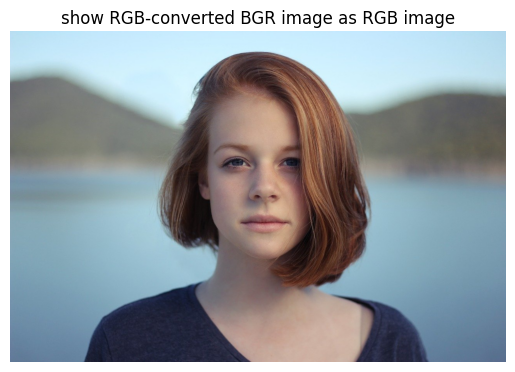

In [21]:
im_BGR_to_RGB = im_BGR[:, :, ::-1]
imshow(im_BGR_to_RGB)
plt.title('show RGB-converted BGR image as RGB image')
plt.axis('off')
plt.show()

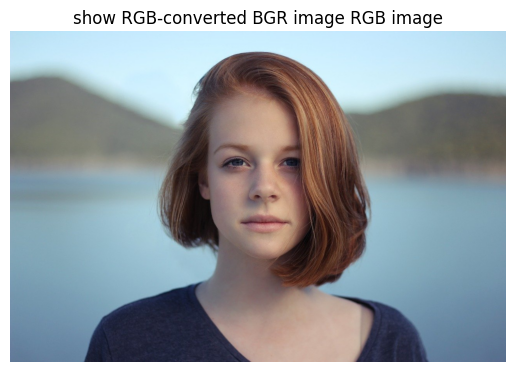

In [22]:
im_BGR_to_RGB = np.zeros_like(im_BGR)

im_BGR_to_RGB[:, :, 0] = im_BGR[:, :, 2]
im_BGR_to_RGB[:, :, 1] = im_BGR[:, :, 1]
im_BGR_to_RGB[:, :, 2] = im_BGR[:, :, 0]

imshow(im_BGR_to_RGB)
plt.title('show RGB-converted BGR image RGB image')
plt.axis('off')
plt.show()

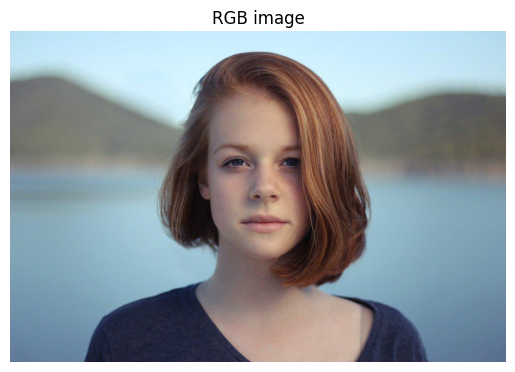

In [23]:
imsave('girl_rgb.jpg', im_RGB) # scikit-image: RGB
im = imread('girl_rgb.jpg') # scikit-image: RGB
imshow(im) # matplotlib: RGB
plt.title('RGB image')
plt.axis('off')
plt.show()

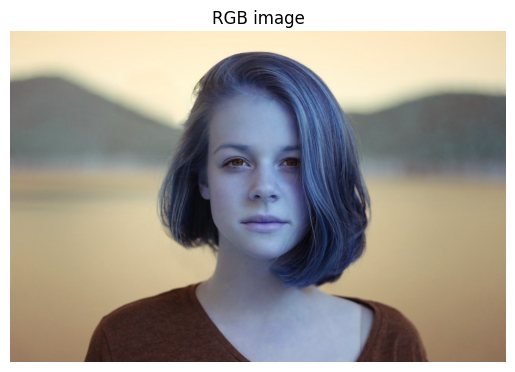

In [24]:
cv2.imwrite('girl_rgb.jpg', im_RGB) # Opencv: BGR
im = imread('girl_rgb.jpg') # scikit-image: RGB
imshow(im) # matplotlib: RGB
plt.title('RGB image')
plt.axis('off')
plt.show()

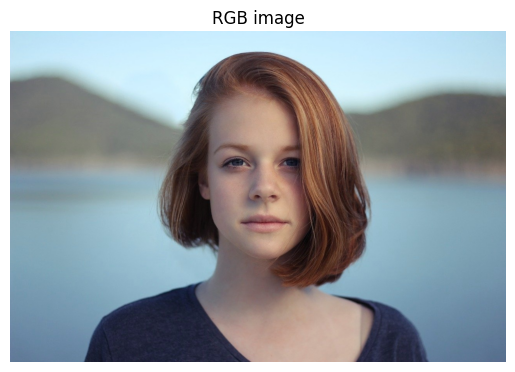

In [25]:
cv2.imwrite('girl_rgb.jpg', im_RGB) # Opencv: BGR
im = cv2.imread('girl_rgb.jpg') # scikit-image: RGB
imshow(im) # matplotlib: RGB
plt.title('RGB image')
plt.axis('off')
plt.show()

グレースケールへの変換

<>:33: SyntaxWarning: invalid escape sequence '\g'
<>:44: SyntaxWarning: invalid escape sequence '\g'
<>:33: SyntaxWarning: invalid escape sequence '\g'
<>:44: SyntaxWarning: invalid escape sequence '\g'
/var/folders/c9/8mjjv7c56nl6dl3x90xkd8j80000gn/T/ipykernel_2926/3900797673.py:33: SyntaxWarning: invalid escape sequence '\g'
  plt.title("$\gamma'$ of PAL and NTSC min {0:.2f} max {1:.2f}".format(im_gray3.min(), im_gray3.max() ))
/var/folders/c9/8mjjv7c56nl6dl3x90xkd8j80000gn/T/ipykernel_2926/3900797673.py:44: SyntaxWarning: invalid escape sequence '\g'
  plt.title("$\gamma'$ of HDTV min {0:.2f} max {1:.2f}".format(im_gray4.min(), im_gray4.max() ))


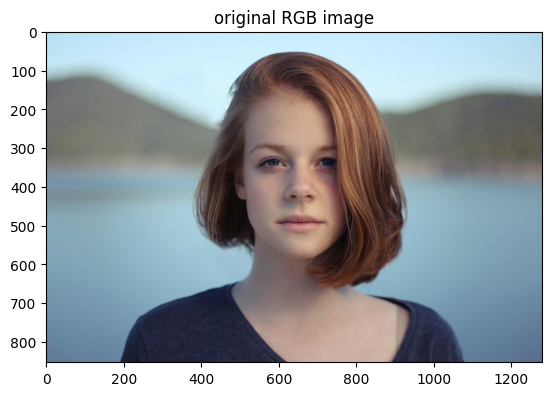

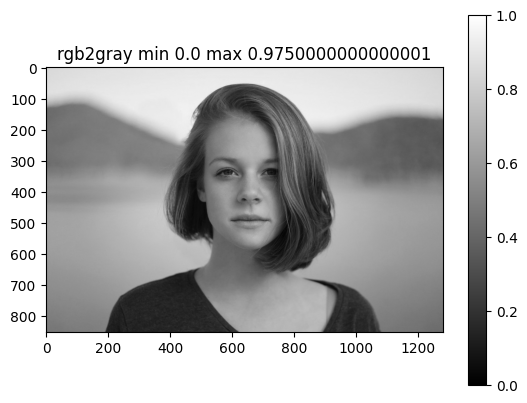

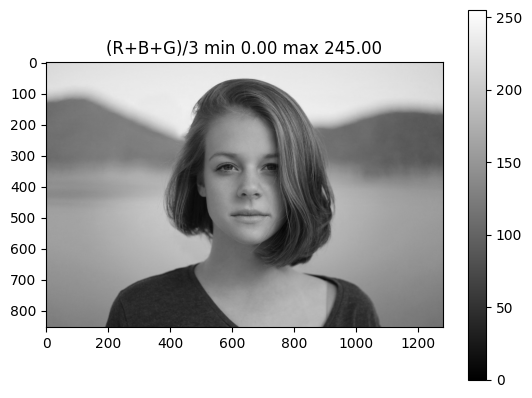

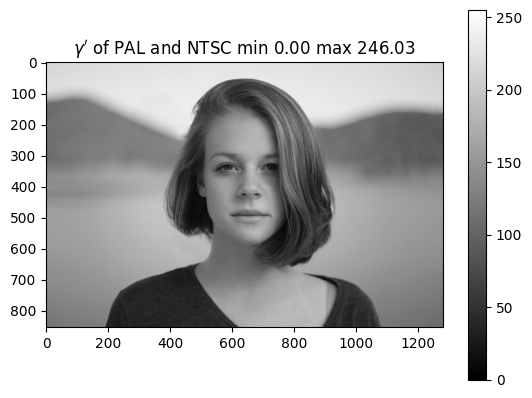

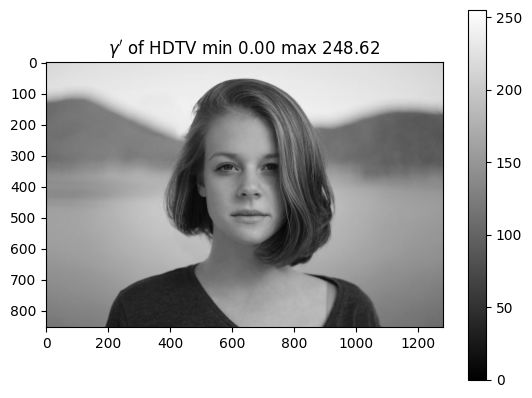

In [26]:
# im = imread('lake.jpg')
# im = imread('flag.png')[:,:,:3]  # RGBAの場合はRGBだけ取り出す
im = imread('girl.jpg')

imshow(im)
plt.title("original RGB image")
plt.show()

# 組み込みのrgb2gray関数を使う gray = 0.2125 R + 0.7154 G + 0.0721 B
im_gray1 = rgb2gray(im)
imshow(im_gray1, vmin=0, vmax=1) # 型はfloat，範囲は[0,1]になる
plt.colorbar()
plt.title("rgb2gray min {0} max {1}".format(im_gray1.min(), im_gray1.max() ))
plt.show()

# RGBの平均をグレースケール画像とする．最初にfloatに変換し（範囲は[0,255]になる），表示のときにuint8に変換する
im_gray2 = (im[:,:,0].astype(float) +
            im[:,:,1].astype(float) + 
            im[:,:,2].astype(float)) / 3
imshow(im_gray2, vmin=0, vmax=255)
plt.colorbar()
plt.title("(R+B+G)/3 min {0:.2f} max {1:.2f}".format(im_gray2.min(), im_gray2.max() ))
plt.show()


# RGBの重み付き平均をグレースケール画像とする．
# https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems
im_gray3 = (0.299 * im[:,:,0].astype(float) +
            0.587 * im[:,:,1].astype(float) + 
            0.114 * im[:,:,2].astype(float))
imshow(im_gray3, vmin=0, vmax=255)
plt.colorbar()
plt.title("$\gamma'$ of PAL and NTSC min {0:.2f} max {1:.2f}".format(im_gray3.min(), im_gray3.max() ))
plt.show()

# RGBの重み付き平均をグレースケール画像とする．その2．規格によって重み係数は異なる
# https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems
# rgb2gray()はこれを使っている．http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray
im_gray4 = (0.2126 * im[:,:,0].astype(float) +
            0.7152 * im[:,:,1].astype(float) + 
            0.0722 * im[:,:,2].astype(float))
imshow(im_gray4, vmin=0, vmax=255)
plt.colorbar()
plt.title("$\gamma'$ of HDTV min {0:.2f} max {1:.2f}".format(im_gray4.min(), im_gray4.max() ))
plt.show()

ヒストグラム


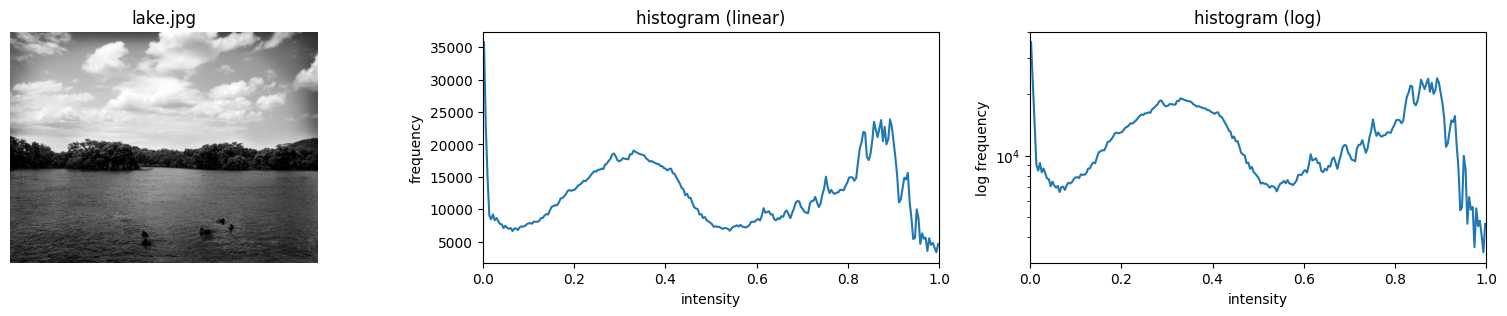

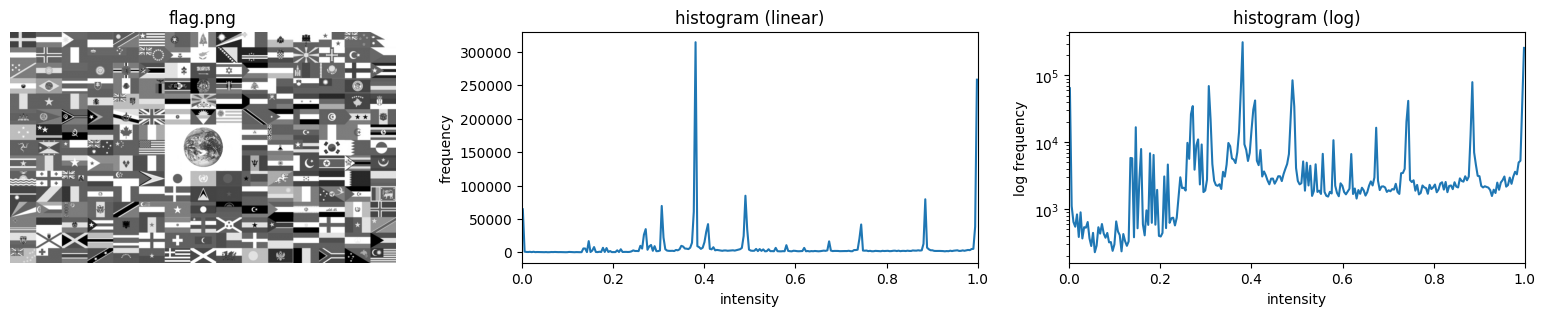

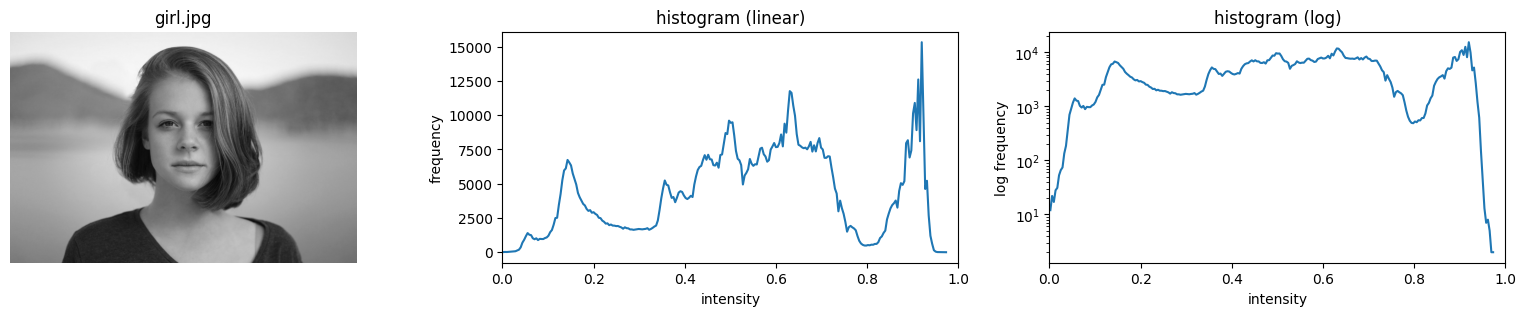

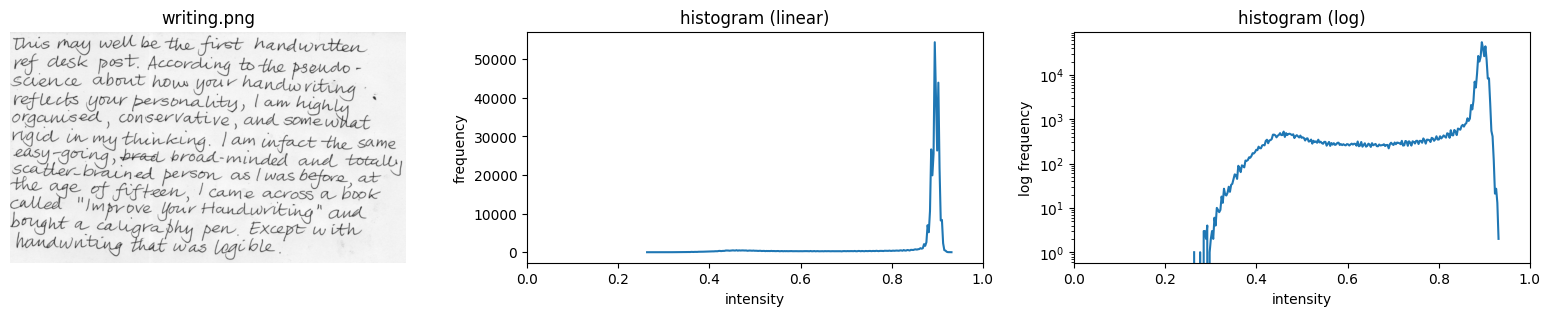

In [27]:
im_files = ['lake.jpg', 'flag.png', 'girl.jpg', 'writing.png']

for file in im_files:
    im = imread(file)[:,:,:3]  # RGBAの場合はRGBだけ取り出す

    fig = plt.figure(figsize=(20,3))

    ax = fig.add_subplot(1, 3, 1)
    im = rgb2gray(im) # 範囲は[0,1]
    imshow(im)
    plt.title(file)
    plt.axis('off')

    bins = 256

    ax = fig.add_subplot(1, 3, 2)
    freq, bins = histogram(im)
    plt.plot(bins, freq)
    plt.xlabel("intensity")
    plt.ylabel("frequency")
    plt.title('histogram (linear)')
    plt.xlim(0,1)


    ax = fig.add_subplot(1, 3, 3)
    freq, bins = histogram(im)
    plt.plot(bins, freq)
    plt.xlabel("intensity")
    plt.ylabel("log frequency")
    plt.yscale('log')
    plt.title('histogram (log)')
    plt.xlim(0,1)

    plt.show();

"""統計量"""



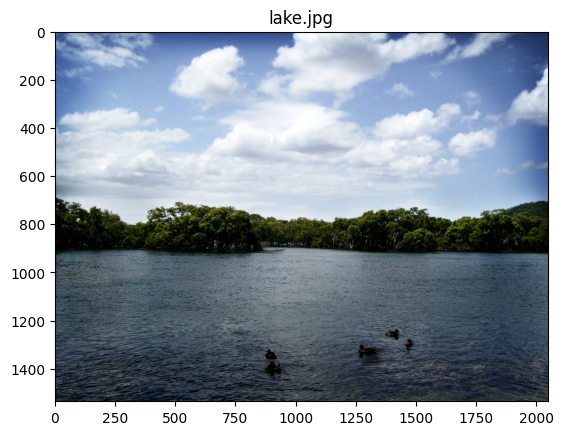

mean:  0.5037135814742794
std:  0.28415553393858106
median:  0.45636941176470586
max:  1.0
min:  0.0
contrast:  1.0
contrast:  nan
contrast:  1.0



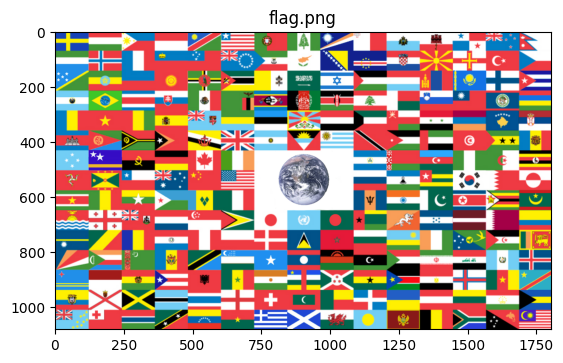

mean:  0.5482135267447418
std:  0.28582684534902325
median:  0.42936980392156865
max:  1.0
min:  0.0
contrast:  1.0
contrast:  nan
contrast:  1.0



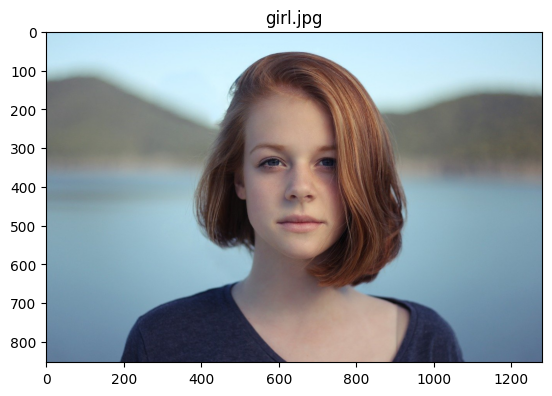

mean:  0.54935631090636
std:  0.2266103705927726
median:  0.5669650980392158
max:  0.9750000000000001
min:  0.0
contrast:  1.0
contrast:  nan
contrast:  0.9750000000000001



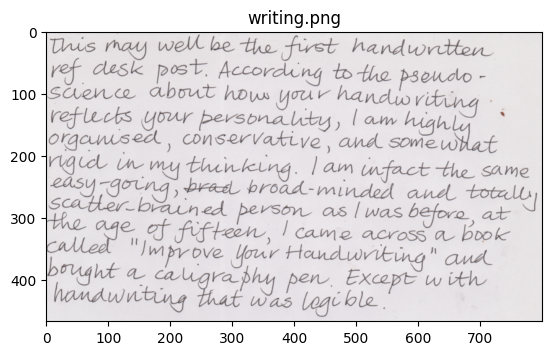

mean:  0.8507730295933578
std:  0.11681077843745837
median:  0.8940949019607843
max:  0.9324772549019609
min:  0.2621341176470588
contrast:  0.5611390889612472
contrast:  3.5572525364953136
contrast:  0.670343137254902



In [28]:
im_files = ['lake.jpg', 'flag.png', 'girl.jpg', 'writing.png']

for file in im_files:
    im = imread(file)[:,:,:3]  # RGBAの場合はRGBだけ取り出す
    imshow(im)
    plt.title(file)
    plt.show()
    
    im = rgb2gray(im)
    print('mean: ', im.mean())
    print('std: ', im.std())
    print('median: ', np.median(im))
    print('max: ', im.max())
    print('min: ', im.min())
    print('contrast: ', (im.max() - im.min()) / (im.max() + im.min()) ) # Michelson contrast
    print('contrast: ', im.max() / im.min() if im.min() > 0 else np.nan ) # contrast ratio
    print('contrast: ', im.max() - im.min() ) # contrast difference
    print()


平均と分散の計算方法
定義式そのまま
計算量大：2重ループ2回
書いてはいけないコード

In [29]:
im = rgb2gray(imread('girl.jpg'))

In [30]:
h, w = im.shape

mean = 0
for y in range(h):
    for x in range(w):
        mean += im[y, x]
mean /= h * w
print('mean:', mean)


var = 0
for y in range(h):
    for x in range(w):
        var += (im[y, x] - mean) ** 2
var /= h * w
print('var:', var)
print('std:', np.sqrt(var))


mean: 0.5493563109059222
var: 0.05135226006016288
std: 0.2266103705927045


定義式を変形したもの
計算量は半分：2重ループ1回
数式から導出できる


In [31]:
h, w = im.shape

mean = 0
var = 0
for y in range(h):
    for x in range(w):
        mean += im[y, x]
        var  += im[y, x]**2

mean /= h * w
print('mean: ', mean)

var /= h * w
var -= mean**2
print('variance: ', var)
print('std: ', np.sqrt(var))

mean:  0.5493563109059222
variance:  0.05135226006073279
std:  0.226610370593962


タスク
カメラを手で抑えて真っ暗な画像を撮影する
その画像を読み込み，ヒストグラムと統計量を計算する
ガンマ変換


In [ ]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray

files = ['flag.png', 'lake.jpg', 'girl.jpg']

@interact(gamma=(0.1, 10, 0.1),
          file=files)
def g(gamma=1.0, file=files[0]):
    # 画像読み込み & グレースケール化
    im = rgb2gray(imread(file)[:, :, :3])

    # 1行2列のサブプロットを用意
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ---------- 1. 元画像 ----------
    ax = axes[0]
    im0 = ax.imshow(im, vmin=0, vmax=1, cmap='gray')
    fig.colorbar(im0, ax=ax)
    ax.set_title('original image')
    ax.axis('off')

    # ---------- 2. トーンカーブ ----------
    ax = axes[1]
    x = np.linspace(0, 1, 256)
    ax.plot(x, x**gamma)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')  # 正方形にする
    ax.set_xlabel('input')
    ax.set_ylabel('output')
    ax.set_title('tone curve')

    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='gamma', max=10.0, min=0.1), Dropdown(description='fi…

チャンネル別のガンマ変換


In [ ]:
vals = (val_start, val_end, val_step) = 0.1, 10, 0.1
val_default = 1.0

files = ['flag.png', 'lake.jpg', 'girl.jpg']

@interact(r_gamma=vals,
          g_gamma=vals,
          b_gamma=vals,
          file=files)
def g(r_gamma=val_default,
      g_gamma=val_default,
      b_gamma=val_default,
      file=files[0]):
    
    im = imread(file)[:,:,:3]  # RGBAの場合はRGBだけ取り出す
    
    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    imshow(im, vmin=0, vmax=255)
    plt.title('original image')
    
    ax = fig.add_subplot(1, 3, 2)
    im[:, :, 0] = 255 * (im[:, :, 0]/255) ** r_gamma
    im[:, :, 1] = 255 * (im[:, :, 1]/255) ** g_gamma
    im[:, :, 2] = 255 * (im[:, :, 2]/255) ** b_gamma
    imshow(im, vmin=0, vmax=1)
    plt.title('$\gamma$ = ({0},{1},{2})'.format(r_gamma, g_gamma, b_gamma))
    
    ax = fig.add_subplot(1, 3, 3)
    x = np.arange(0, 1, 0.01)
    plt.plot(x, x ** r_gamma, c='red', label='$\gamma$ for R')
    plt.plot(x, x ** g_gamma, c='green', label='$\gamma$ for G')
    plt.plot(x, x ** b_gamma, c='blue', label='$\gamma$ for B')
    plt.legend()
    ax.set_aspect('equal')
    ax.set_xlabel('input')
    ax.set_ylabel('output')

    plt.show();

<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:32: SyntaxWarning: invalid escape sequence '\g'
<>:33: SyntaxWarning: invalid escape sequence '\g'
<>:34: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:32: SyntaxWarning: invalid escape sequence '\g'
<>:33: SyntaxWarning: invalid escape sequence '\g'
<>:34: SyntaxWarning: invalid escape sequence '\g'
/var/folders/c9/8mjjv7c56nl6dl3x90xkd8j80000gn/T/ipykernel_2926/1993857202.py:28: SyntaxWarning: invalid escape sequence '\g'
  plt.title('$\gamma$ = ({0},{1},{2})'.format(r_gamma, g_gamma, b_gamma))
/var/folders/c9/8mjjv7c56nl6dl3x90xkd8j80000gn/T/ipykernel_2926/1993857202.py:32: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(x, x ** r_gamma, c='red', label='$\gamma$ for R')
/var/folders/c9/8mjjv7c56nl6dl3x90xkd8j80000gn/T/ipykernel_2926/1993857202.py:33: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(x, x ** g_gamma, c='green', label='$\gamma$ for G')
/var/folders/c9/

interactive(children=(FloatSlider(value=1.0, description='r_gamma', max=10.0, min=0.1), FloatSlider(value=1.0,…

擬似からー表示

In [39]:
im = rgb2gray(imread('IR_cat.jpg'))

cmaps = ['gray', 'gray_r', 
         'jet', 'jet_r',
         'rainbow', 'rainbow_r',
         'hsv', 'hsv_r',
         'terrain', 'terrain_r'
         'twilight', 'twilight_r',
         'twilight_shifted', 'twilight_shifted_r',
         'viridis', 'viridis_r',
         'Greys','Greys_r',
         'Purples', 'Purples_r'
       ]

@interact(cmap=RadioButtons(options=cmaps))
def g(cmap='gray'):
    
    imshow(im, cmap=cmap)
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

interactive(children=(RadioButtons(description='cmap', options=('gray', 'gray_r', 'jet', 'jet_r', 'rainbow', '…

51. notebook：画像の平均
画像間の演算
平均

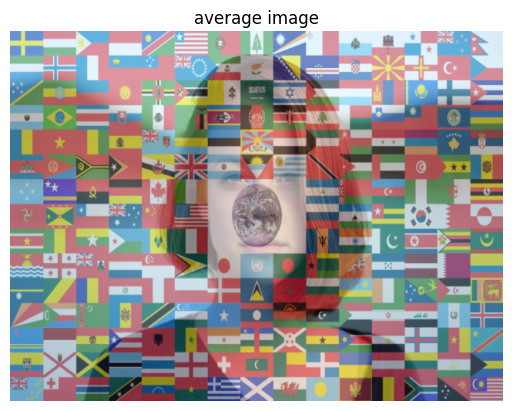

In [40]:
im1 = imread('girl.jpg')
im2 = imread('flag.png')[:,:,:3] # alphaチャンネルを除去

im1 = resize(im1, (480, 640, 3))
im2 = resize(im2, (480, 640, 3))

im_ave = (im1 + im2) / 2
imshow(im_ave)
plt.axis('off')
plt.title('average image')
plt.show();

重み付き平均


In [ ]:
vals = (val_start, val_end, val_step) = 0.0, 1, 0.1
val_default = 0.5

im1 = imread('girl.jpg')
im2 = imread('flag.png')[:,:,:3] # alphaチャンネルを除去

im1 = resize(im1, (480, 640, 3))
im2 = resize(im2, (480, 640, 3))

@interact(alpha=vals)
def g(alpha=val_default):
    
    
    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    im_weighted_ave = alpha * im1 + (1 - alpha) * im2
    imshow(im_weighted_ave)
    
    ax = fig.add_subplot(1, 3, 2)
    imshow(alpha * im1)
    plt.title('weight: {:.2f}'.format(alpha))
    

    ax = fig.add_subplot(1, 3, 3)
    imshow((1 - alpha) * im2)
    plt.title('weight: {:.2f}'.format(1 - alpha))

    

    plt.show()

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

アルファブレンディング


In [42]:
vals = (val_start, val_end, val_step) = 0, 640, 20
val_default = 320

im1 = imread('girl.jpg')
im2 = imread('flag.png')[:, :, :3] # alphaチャンネルを除去

im1 = resize(im1, (480, 640, 3))
im2 = resize(im2, (480, 640, 3))

@interact(center=vals)
def g(center=val_default):
    

    alpha_mask = np.zeros((480, 640, 3))
    for y in range(480):
        for x in range(640):
            alpha_mask[y, x, :] = 1 / (1 + np.exp(-(x - center) * 0.015))
    
    
    im1_a = im1 * alpha_mask
    im2_a = im2 * (1 - alpha_mask)

    
    fig = plt.figure(figsize=(15, 6))

    
    ax = fig.add_subplot(2, 3, 1)
    im_weighted_ave = im1_a + im2_a
    imshow(im_weighted_ave)
    
    ax = fig.add_subplot(2, 3, 2)
    imshow(im1_a)
  
    ax = fig.add_subplot(2, 3, 3)
    imshow(im2_a)

    ax = fig.add_subplot(2, 3, 5)
    imshow(alpha_mask)
  
    ax = fig.add_subplot(2, 3, 6)
    imshow(1 - alpha_mask)

  
    plt.show()

interactive(children=(IntSlider(value=320, description='center', max=640, step=20), Output()), _dom_classes=('…

二値化


In [ ]:
im = rgb2gray(imread('text.jpg'))

@interact(black_size(1, 500, 10))
def g(black_size=51):

    fig = plt.figure(figsize=(15, 2.5))
    
    ax = fig.add_subplot(1, 3, 1)
    